# Hipótesis

   Después de analizar y limpiar los datos, me he quedado con una base de datos en la que tengo los ataques de tiburón filtrados por meses y países.
Quiero demostrar que los tiburones atacan más durante los meses de verano.
   Lo que nos hace pensar en esta hipótesis, es que durante los meses de verano, la presencia humana en los mares y océanos es mayor.

In [1]:
import pandas as pd    #importar librerías
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline   
# ajuste parámetros matplotlib y seaborn
%config Inlinebackend.figure_format= 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

In [3]:
attacks_hp = pd.read_csv("Data/attacks_month.csv") #importar archivos de datos
attacks_year = pd.read_csv("Data/attacks_year.csv")
attacks_hp.to_csv("Data/attacks_hp.csv", index=False)

In [4]:
attacks_hp.sample(5)

,month,country
2473,July,usa
4468,October,australia
3122,June,south africa
4,April,usa
5152,September,usa


In [5]:
group = attacks_hp.country.value_counts()
group

usa                        2021
australia                  1154
south africa                524
brazil                      106
new zealand                 101
                           ... 
palestinian territories       1
guinea                        1
iceland                       1
st. maartin                   1
tasman sea                    1
Name: country, Length: 161, dtype: int64

In [6]:
attacks_hp.month.unique()

array(['April', 'August', 'December', 'February', 'January', 'July',
       'June', 'March', 'May', 'November', 'October', 'September'],
      dtype=object)

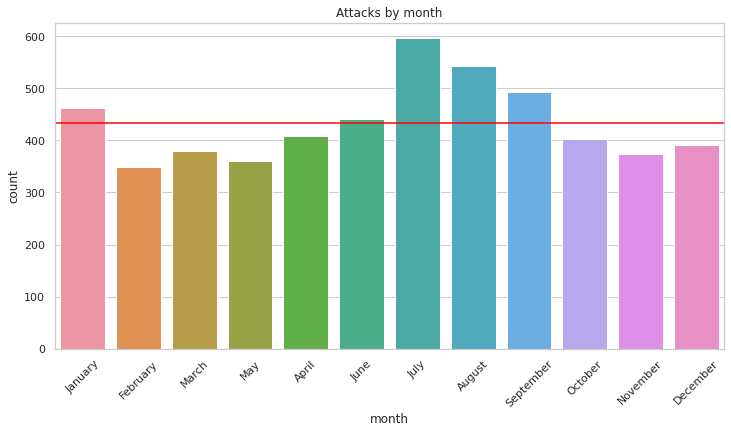

In [7]:
month_lst = ["January", "February", "March", "May", "April", "June", "July", "August", "September", "October", "November", "December"]
graf = sns.countplot(x = "month", data = attacks_hp, order = month_lst)
graf.axhline(y=attacks_hp.month.value_counts().mean(), c="red", label="mean") #línea de media
plt.title("Attacks by month")
plt.xticks(rotation=45);
graf.figure.savefig("Figures/Attacks_month.jpg") #exportar gráfico

En este gráfico podemos ver el número de ataques por meses. Viendo la línea que marca la media, realmente no existe una gran diferencia entre unos meses y otros, por lo que así no podemos demostrar que los tiburones atacan más en verano. 

Sin embargo, los datos con los que estamos trabajando son a nivel mundial, y los meses de verano no son los mismos en el hemisferio norte que en el sur.

In [8]:
usa = attacks_hp[attacks_hp["country"] == "usa"]
usa.to_csv("Data/usa.csv", index=False)
australia = attacks_hp[attacks_hp["country"] == "australia"]
australia.to_csv("Data/australia.csv", index=False)
south_africa = attacks_hp[attacks_hp["country"] == "south africa"]
south_africa.to_csv("Data/south_africa.csv", index=False)
bahamas = attacks_hp[attacks_hp["country"] == "bahamas"]
bahamas.to_csv("Data/bahamas.csv", index=False)

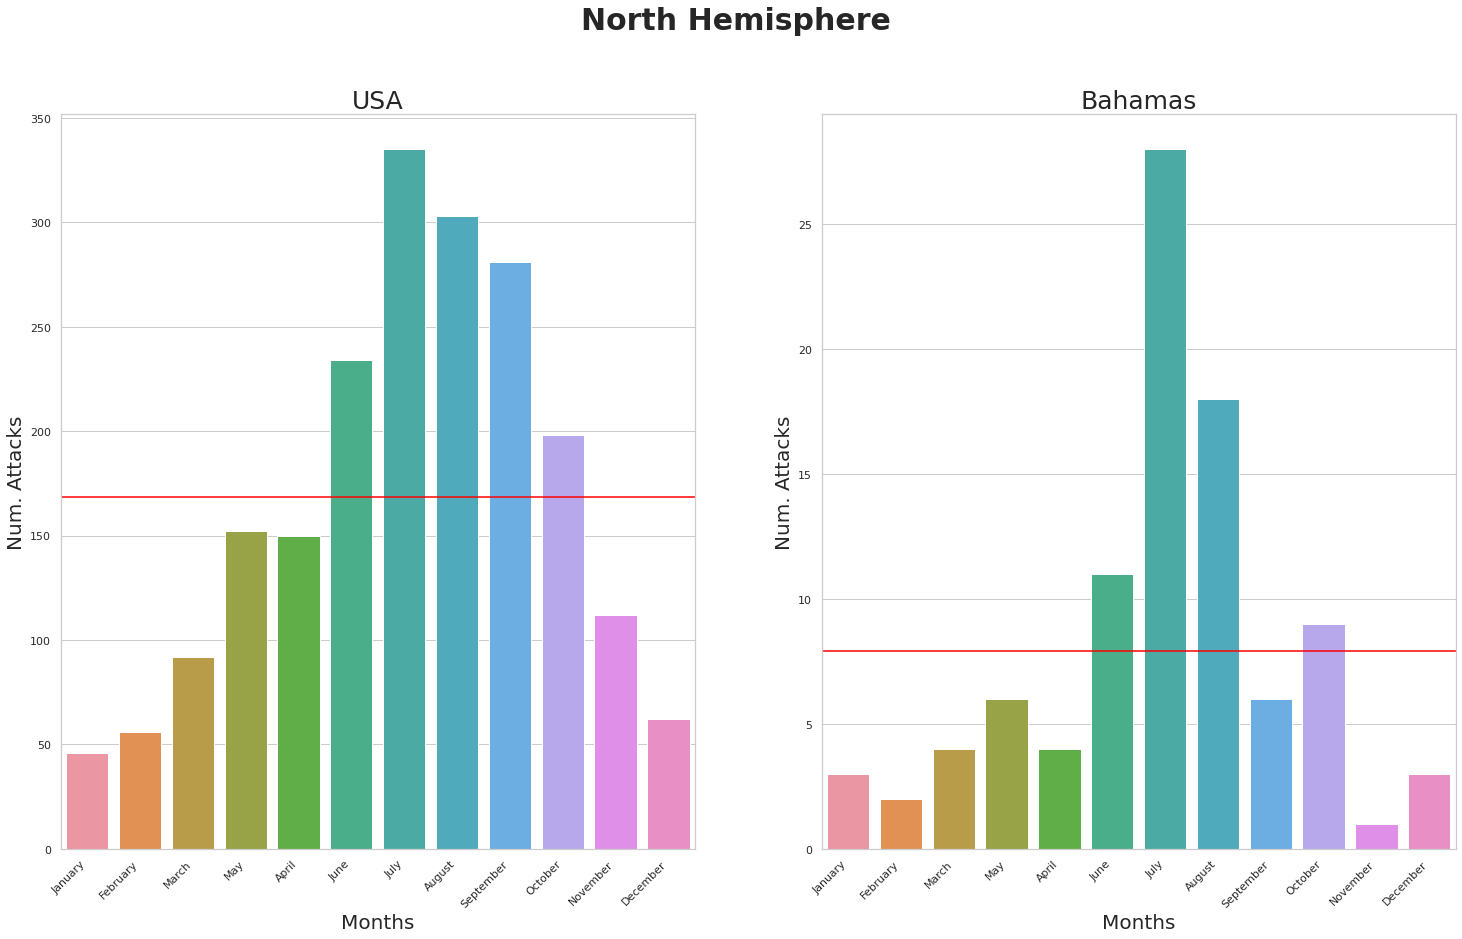

In [9]:
sub_plot1 = figura, eje = plt.subplots(nrows=1, ncols=2, figsize=(25,15))
figura.suptitle('North Hemisphere', fontsize = 30, fontweight="bold")
eje[0].set_title('USA',fontsize = 25)
eje[1].set_title('Bahamas',fontsize = 25)
usa_plot = sns.countplot(x = "month", data = usa, order = month_lst, ax=eje[0])
usa_plot.axhline(y=usa.month.value_counts().mean(), c="red", label="mean")
usa_plot.set_xlabel("Months", fontsize = 20)
usa_plot.set_ylabel("Num. Attacks", fontsize = 20)
bahamas_plot = sns.countplot(x = "month", data = bahamas, order = month_lst, ax=eje[1])
bahamas_plot.axhline(y=bahamas.month.value_counts().mean(), c="red", label="mean")
bahamas_plot.set_xlabel("Months", fontsize = 20)
bahamas_plot.set_ylabel("Num. Attacks", fontsize = 20)
figura.autofmt_xdate(rotation=45);
figura.savefig("Figures/North_Hemisphere.jpg")



Una vez que profundizamos más en los datos, con esta gráfica de dos ubicaciones del hemisferio norte, sí podemos ver que en los meses de verano se producen más ataques.

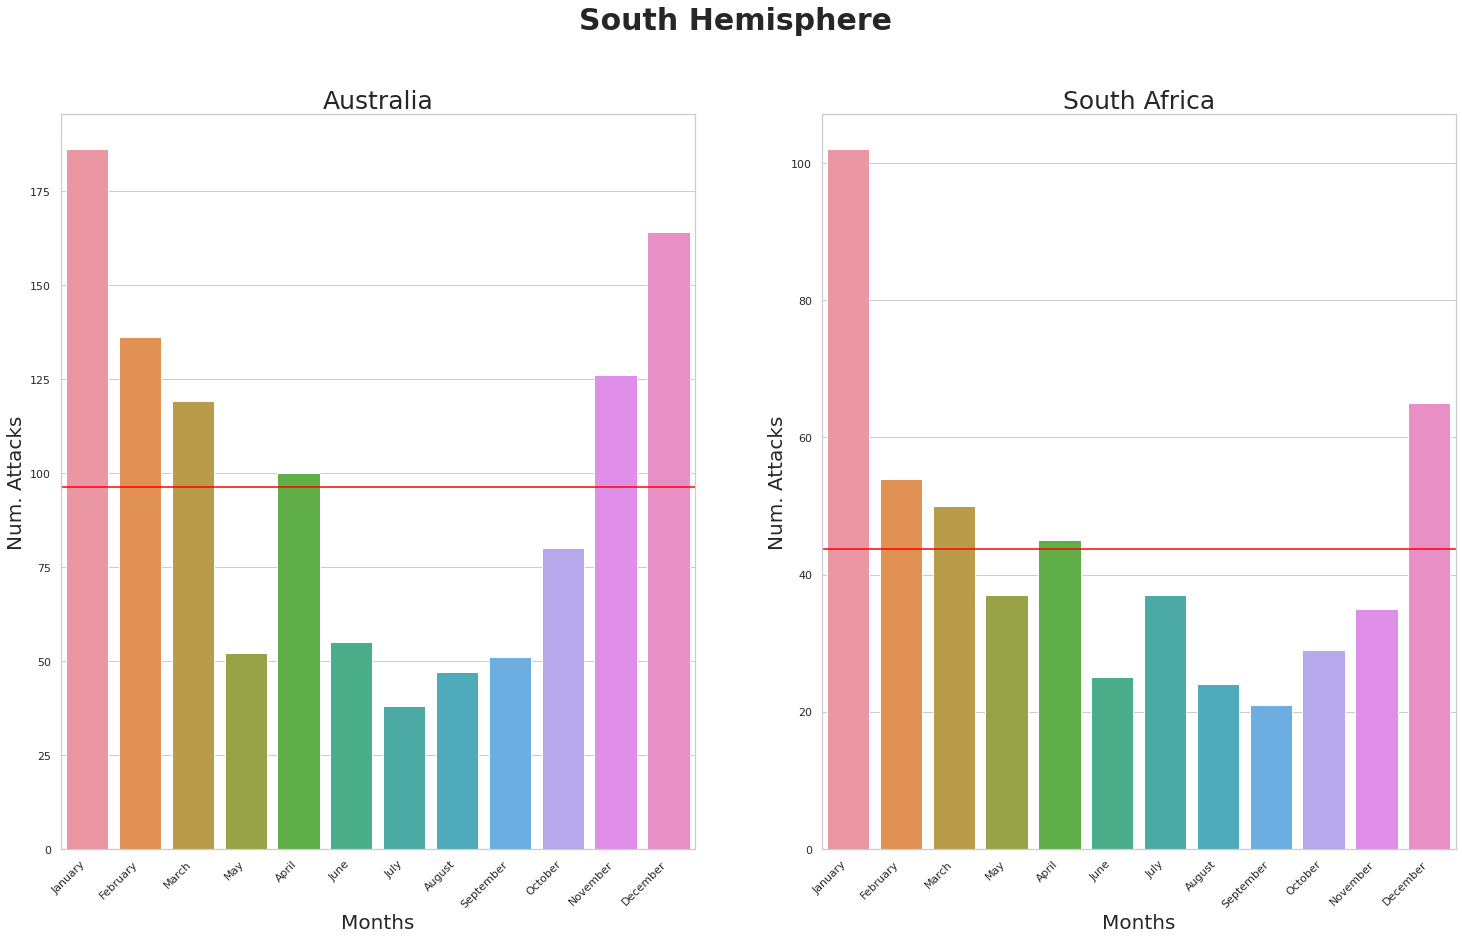

In [10]:
figura, eje = plt.subplots(nrows=1, ncols=2, figsize=(25,15))
figura.suptitle('South Hemisphere', fontsize = 30, fontweight="bold")
eje[0].set_title('Australia', fontsize = 25)
eje[1].set_title('South Africa', fontsize = 25)
australia_plot = sns.countplot(x = "month", data = australia, order = month_lst, ax=eje[0])
australia_plot.axhline(y=australia.month.value_counts().mean(), c="red", label="mean")
australia_plot.set_xlabel("Months", fontsize = 20)
australia_plot.set_ylabel("Num. Attacks", fontsize = 20);
south_africa_plot = sns.countplot(x = "month", data = south_africa, order = month_lst, ax=eje[1])
south_africa_plot.axhline(y=south_africa.month.value_counts().mean(), c="red", label="mean")
south_africa_plot.set_xlabel("Months", fontsize = 20)
south_africa_plot.set_ylabel("Num. Attacks", fontsize = 20)
figura.autofmt_xdate(rotation=45);
figura.savefig("Figures/South_Hemisphere.jpg")

Lo mismo sucede en la gráfica del hemisferio sur. Durante los meses de verano (de diciembre a febrero) se ve claramente el incremento de ataques sobre la media.

Por lo tanto, podemos afirmar que en base a los datos, los tiburones atacan más de media en los meses de verano.

# Hipótesis 2

Una vez vistos los datos, podemos presuponer que USA es el país con más ataques de tiburón. Nos hemos quedado con los países que tienen más de 50 datos para realizar este análisis.

In [11]:
attacks_country = attacks_hp.groupby(['country']).agg({'month':'count'}).reset_index().rename(columns={'month':"total"})
attacks_country = attacks_country[attacks_country['total'] > 50]
attacks_country #datos agrupados en base al país

,country,total
6,australia,1154
8,bahamas,95
13,brazil,106
83,mexico,70
94,new zealand,101
107,papua new guinea,81
111,philippines,52
116,reunion,52
129,south africa,524
155,usa,2021


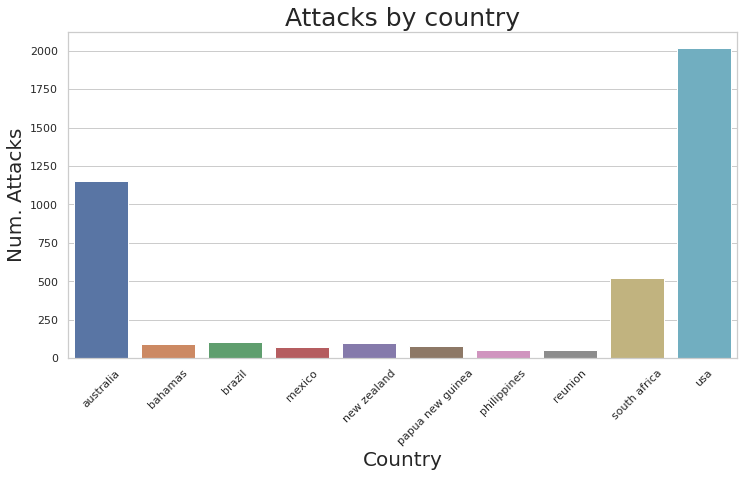

In [12]:
country_plot = sns.barplot(data = attacks_country, x = "country", y = "total")
country_plot.set_xlabel("Country", fontsize = 20)
country_plot.set_ylabel("Num. Attacks", fontsize = 20)
country_plot.set_title("Attacks by country", fontsize = 25)
plt.xticks(rotation=45);
country_plot.figure.savefig("Figures/Attacks_country.jpg")

En este gráfico podemos ver que efectivamente USA es el país con mayor número de ataques. Dada la diferencia con el resto de ubicaciones, podemos pensar que esta información no es cierta del todo y que seguramente el motivo de este resultado es que en USA se registran más datos. 

In [13]:
attacks_year.max()

year     2018.0
total     143.0
dtype: float64

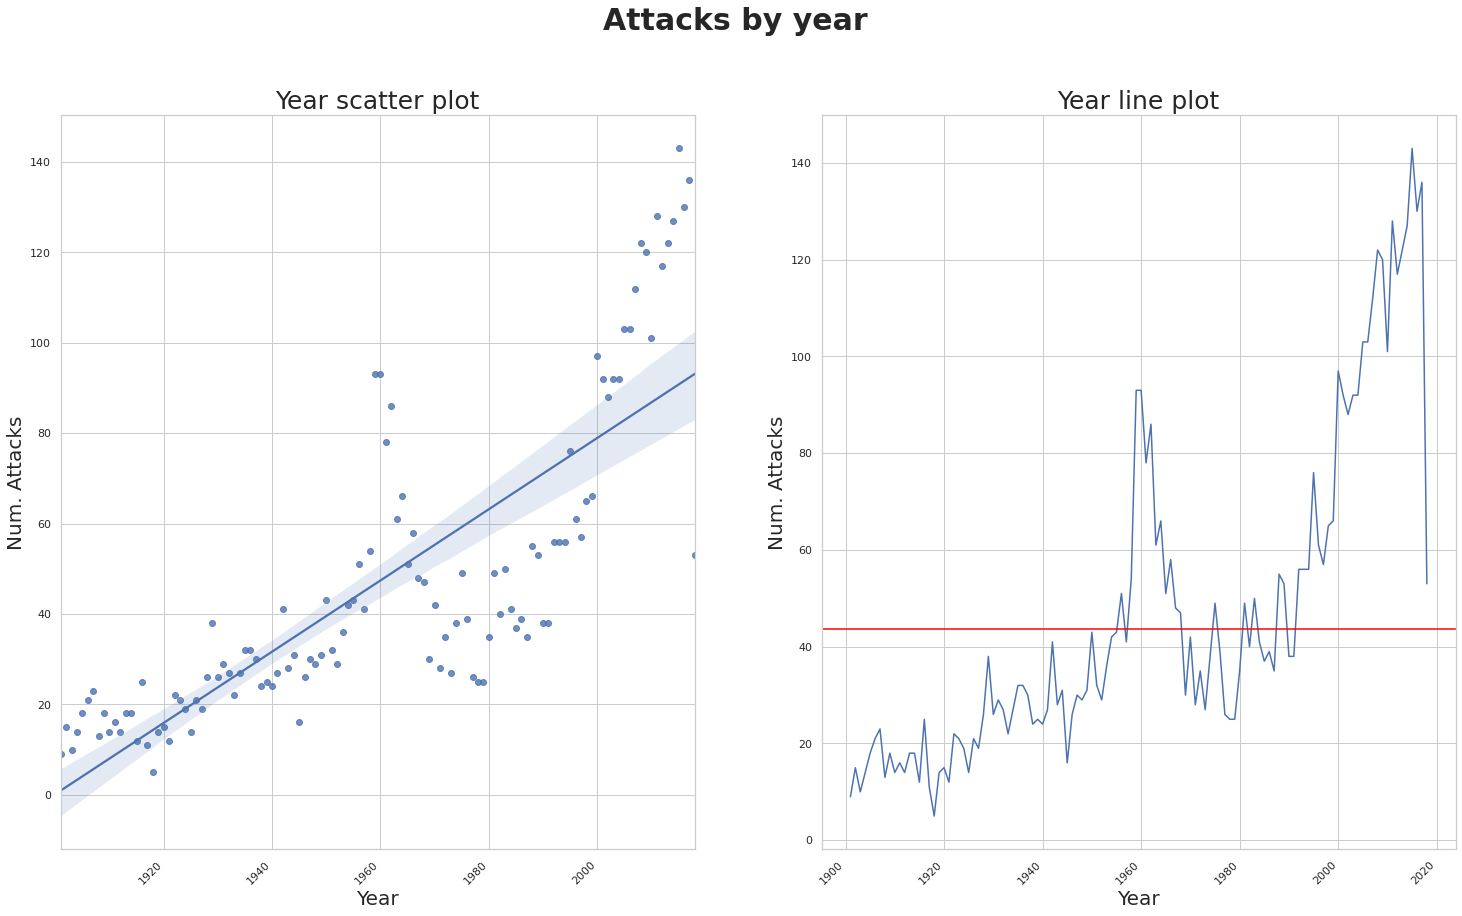

In [14]:
figura, eje = plt.subplots(nrows=1, ncols=2, figsize=(25,15))
figura.suptitle('Attacks by year', fontsize = 30, fontweight="bold")
eje[0].set_title('Year scatter plot', fontsize = 25)
eje[1].set_title('Year line plot', fontsize = 25)
year_plot_1 = sns.regplot(x="year", y="total", data=attacks_year, ax=eje[0])
year_plot_1.set_xlabel("Year", fontsize = 20)
year_plot_1.set_ylabel("Num. Attacks", fontsize = 20);
year_plot_2 = sns.lineplot(data=attacks_year, x="year", y="total", ax=eje[1])
year_plot_2.axhline(y=south_africa.month.value_counts().mean(), c="red", label="mean")
year_plot_2.set_xlabel("Year", fontsize = 20)
year_plot_2.set_ylabel("Num. Attacks", fontsize = 20)
figura.autofmt_xdate(rotation=45)
figura.savefig("Figures/Attacks_year.jpg");

En el subplot de ataques por año (desde 1900 hasta 2018) se puede observar como el número de ataques se incrementa por año. Hay un pico en 1960 y después vuelve a caer para seguir en ascenso hasta la época actual. Esto puede llevar a engaño, ya que la interpretación que debemos hacer en este caso, es que realmente lo que aumenta cada año es el número de registros que se hace sobre los ataques de tiburón, no los ataques en sí mismos.